<a href="https://colab.research.google.com/github/vitesempl/RK-IDE-Python/blob/master/Solving_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a Python package from GitHub

In [1]:
# clone package repository
!git clone https://github.com/vitesempl/RK-IDE-Python.git

# navigate to RK-IDE-Python directory
%cd RK-IDE-Python

# install package RK
!pip install RK

Cloning into 'RK-IDE-Python'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 112 (delta 50), reused 72 (delta 28), pack-reused 0
Receiving objects: 100% (112/112), 631.39 KiB | 15.03 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/RK-IDE-Python
     |████████████████████████████████| 144 kB 8.2 MB/s 
     |████████████████████████████████| 206 kB 39.1 MB/s 
     |████████████████████████████████| 3.0 MB 44.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 961 kB 56.3 MB/s 
  Created wheel for RK: filename=rk-0.3b1-py3-none-any.whl size=23423 sha256=7036a04d58b72a32ba74f73e09123a3a40f4d5581b01b7786da1949f4efe54cc
  Stored in directory: /root/.cache/pip/wheels/1f/07/fa/af105bbf2db5b8a3c0e11d420f22efd8098bf5d4f7b5a43364
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=44a233e859

## Libraries

In [2]:
from RK.ide import ide_solve

from math import *
import numpy as np
import matplotlib.pyplot as plt

## Definition of function for output 

In [3]:
def OutputSolution():
    nz = np.size(history(tspan[0]))
    if nz == 1:
        print("y(", tspan[1], ") = ", sol[1][-1], sep='')
    else:
        for i in range(nz):
            print("y", i + 1, "(", tspan[1], ") = ", sol[1][i, -1], sep='')

In [4]:
def OutputPlot():
    nz = np.size(history(tspan[0]))
    fig = plt.figure(figsize=[9, 5])
    if nz == 1:
        fig = plt.plot(sol[0], sol[1], label="y(t)")
    else:
        for i in range(nz):
            fig = plt.plot(sol[0], sol[1][i], label="y" + str(i + 1) + "(t)")
    plt.title("NUMERICAL SOLUTION")
    plt.legend(fontsize=14)
    plt.xlabel("TIME", fontsize=14)
    plt.ylabel("SOLUTION", fontsize=14)
    plt.grid()

In [5]:
def OutputConvOrder(dde=True):
    nz = np.size(history(tspan[0]))

    plt.rcParams['figure.figsize'] = [10, 5]
    fig, axs = plt.subplots(1, 2)

    if nz == 1:
        axs[0].plot(sol[0], sol[1], label="y(t)")
    else:
        for i in range(nz):
            axs[0].plot(sol[0], sol[1][i], label="y" + str(i + 1) + "(t)")
    axs[0].grid()
    axs[0].set_title("NUMERICAL SOLUTION")
    axs[0].legend(loc='upper left', fontsize=12)
    axs[0].set_xlabel("TIME", fontsize=14)
    axs[0].set_ylabel("SOLUTION", fontsize=14)

    nb = 1
    n = 7
    err = []
    nsteps = []

    for steppow in range(nb, n):
        stepsize = 2**(-steppow)
        if dde:
            sol_test = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
        else:
            sol_test = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
        err.append(abs(analytic_sol - sol_test[1][-1]))
        nsteps.append(stepsize)

    print("Convergence order:", (log10(err[-1]) - log10(err[-2])) / (log10(pow(2, -n)) - log10(pow(2, -n + 1))))

    axs[1].plot(nsteps, err)
    axs[1].grid()

    axs[1].set_title("CONVERGENCE ORDER")
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel("STEPSIZE", fontsize=14)
    axs[1].set_ylabel("ERROR", fontsize=14)

    fig.tight_layout()

# **Examples**

## Example 1 (only integral)

y(5) = 148.41315925335257
Convergence order: 4.003739937904726


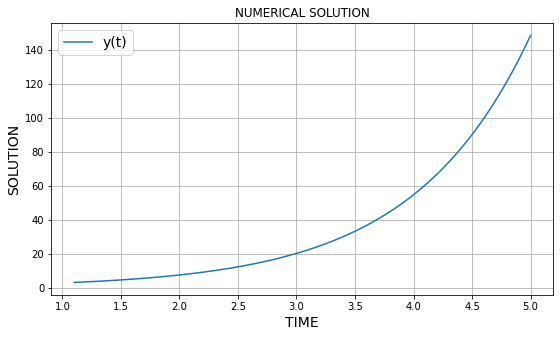

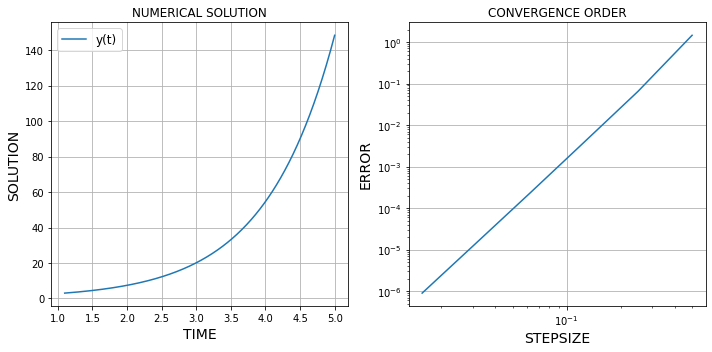

In [6]:
tspan = [1.1, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return ((t - 1) * exp(t ** 2) * i) / (exp(-1) * y - 1)
def         K(t, s, y): return [y * exp(-s * t)]
def      delays_int(t): return [t - 1]  # delays of integrals
def         history(t): return exp(t)

def fun(t): return exp(t)
analytic_sol = fun(tspan[1])

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()
OutputConvOrder(dde=False)

## Example 2 (integral+discrete delays)

y(10) = -0.8390715237122075
Convergence order: 3.9872788027838664


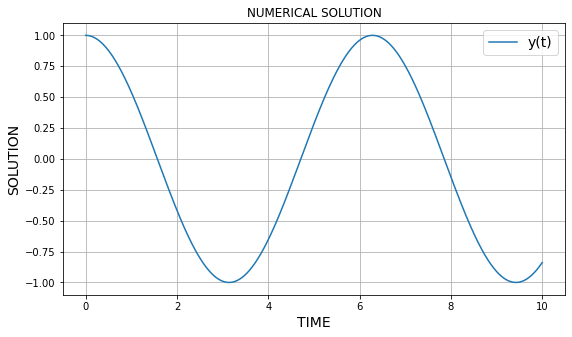

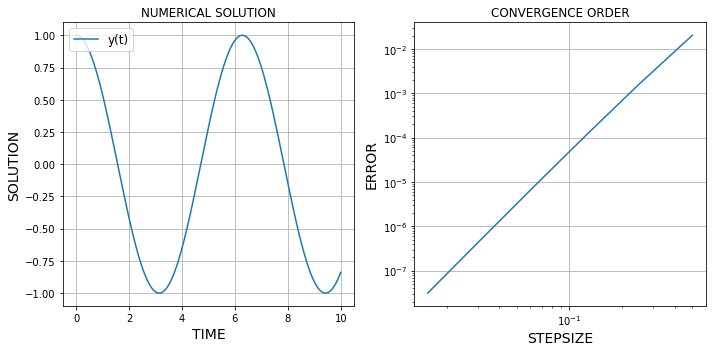

In [7]:
tspan = [0, 10]
stepsize = 1e-2
def idefun(t, y, z, i): return (1 + exp(-pi / 2)) * y - exp(-pi / 2) * z - 2 * exp(-2 * t) * i
def         K(t, s, y): return [y * exp(t + s)]
def       delays(t, y): return [t - pi / 2]  # delays of z
def      delays_int(t): return [t - pi / 2]
def         history(t): return cos(t)

def fun(t): return cos(t)
analytic_sol = fun(tspan[1])

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
OutputSolution()
OutputPlot()
OutputConvOrder(dde=True)

## Example 3 (integral+discrete delays+overlapping)

y(5) = 0.0067379469814580545
Convergence order: 3.9822122393867163


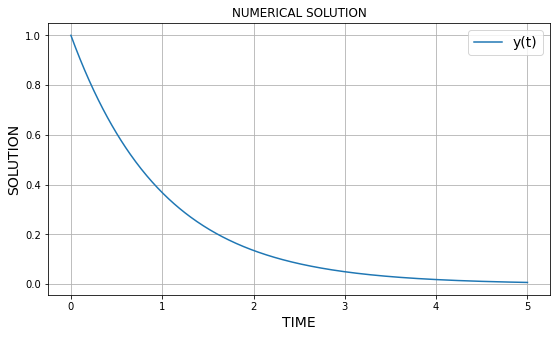

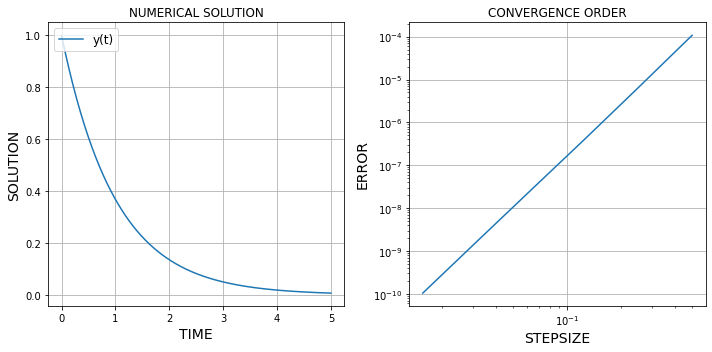

In [8]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return - y**2 - t * exp(t**2) * z**4 * i
def         K(t, s, y): return [y * exp(s - s * t)]
def       delays(t, y): return [t / 2]
def      delays_int(t): return [t - 1]
def         history(t): return exp(-t)

def fun(t): return exp(-t)
analytic_sol = fun(tspan[1])

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
OutputSolution()
OutputPlot()
OutputConvOrder(dde=True)

## Example 4 (2 integrals)



y(5) = 148.41315915325342
Convergence order: 3.9720549006551473


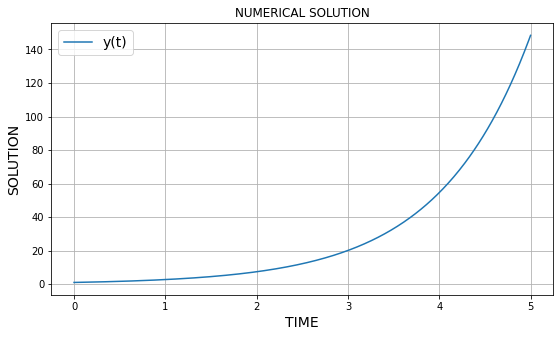

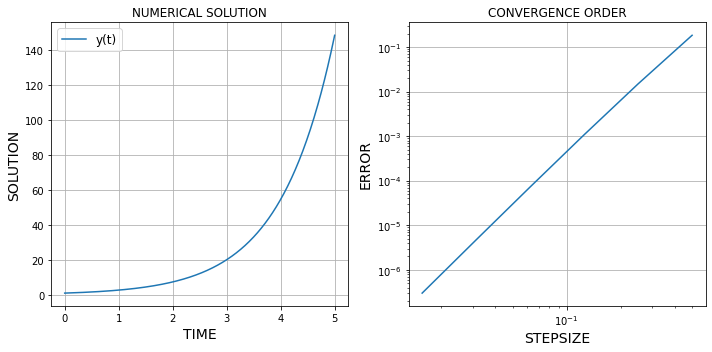

In [9]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return exp(1) - exp(t**2) / (z**2) * (i[0] - exp(-2 * t) * i[1]) * (t - 1)
def         K(t, s, y): return [y * exp(-s * t),
                                y * exp(t * (2 - s))]
def       delays(t, y): return [t-1]
def      delays_int(t): return [t - 1,
                                t - 2]
def         history(t): return exp(t)

def fun(t): return exp(t)
analytic_sol = fun(tspan[1])

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
OutputSolution()
OutputPlot()
OutputConvOrder(dde=True)

## Example 5 (2 discrete delays)

y(5) = 0.006737947029428378
Convergence order: 4.04722434095943


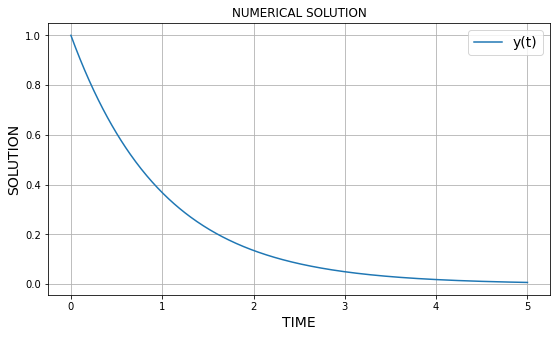

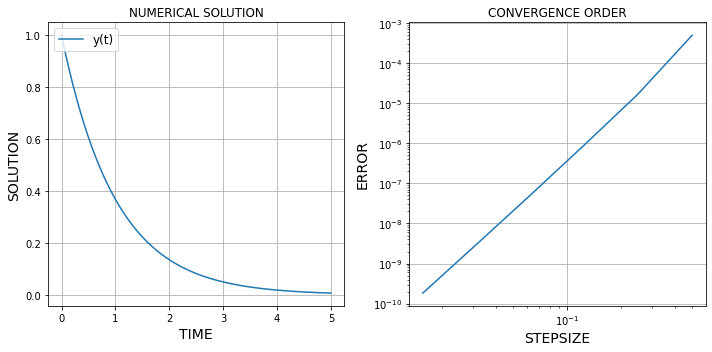

In [10]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return - z[0, 0]**((t + 1) / 2) * z[0, 1] * y**2 * (1 + exp(t**2) * t * i) / exp(1 / 2)
def         K(t, s, y): return [y * exp(s - s * t)]
def       delays(t, y): return [log(y)**2 / (t + 1) - 1 / 2,
                                (t - 1) / 4]
def      delays_int(t): return [t / 2 - 1]
def         history(t): return exp(-t)

def fun(t): return exp(-t)
analytic_sol = fun(tspan[1])

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
OutputSolution()
OutputPlot()
OutputConvOrder(dde=True)

## Example 6 (system of equations)

y1(10) = 0.004329876789507738
y2(10) = -9.145191243868801
y3(10) = 22.026465794883663


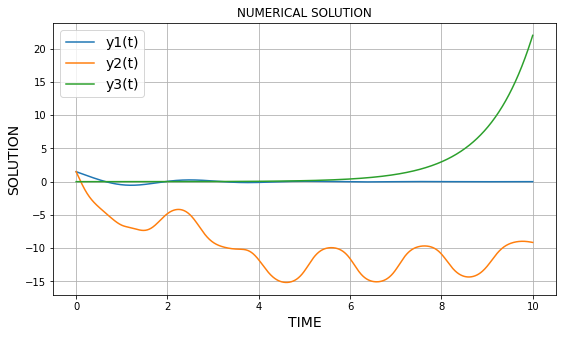

In [11]:
tspan = [0, 10]
stepsize = 1e-2
def idefun(t, y, z, i): return [-2.5 * i[0],
                                -15 * i[1],
                                0.001 * exp(t)]
def         K(t, s, y): return [sin(y[0]),
                                sin(y[1])]
def      delays_int(t): return [t - 1,
                                t - 1]
def         history(t): return [1.5,
                                1.5,
                                0.001 * exp(t)]

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()

## Examples (Yukihiko)

y(25) = -2.0422322898267566


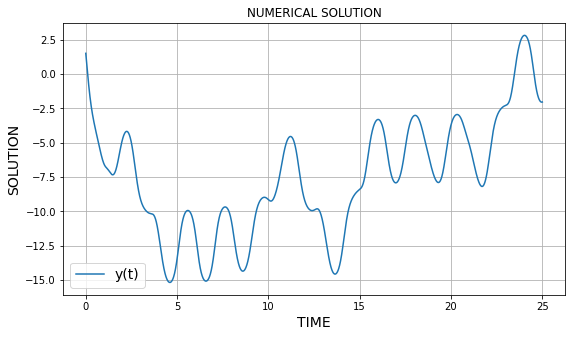

In [12]:
tspan = [0, 25]
stepsize = 1e-2
def idefun(t, y, z, i): return -15 * i
def         K(t, s, y): return [sin(y)]
def      delays_int(t): return [t - 1]
def         history(t): return 1.5

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()

y(25) = -1.2167450865667762


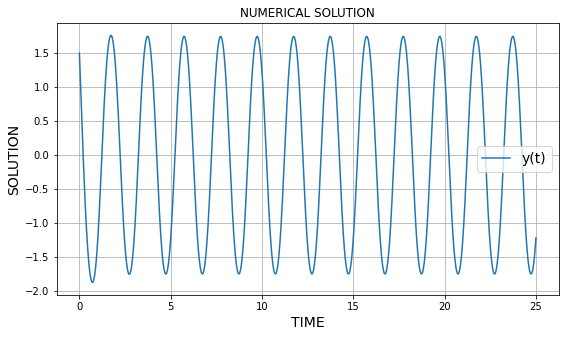

In [13]:
def idefun(t, y, z, i): return -7.5 * i

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()

y(25) = 8.176591500707306e-07


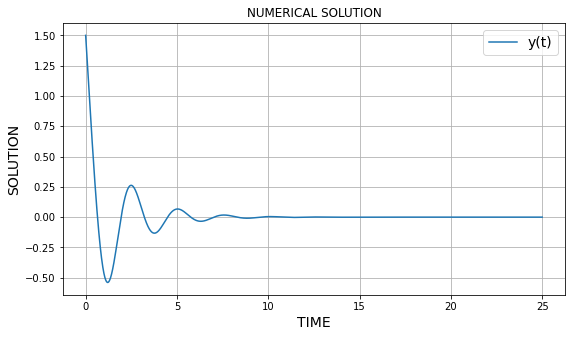

In [14]:
def idefun(t, y, z, i): return -2.5 * i

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()

y1(25) = 8.176591500707301e-07
y2(25) = -1.216745086566778
y3(25) = -2.0422323398058615


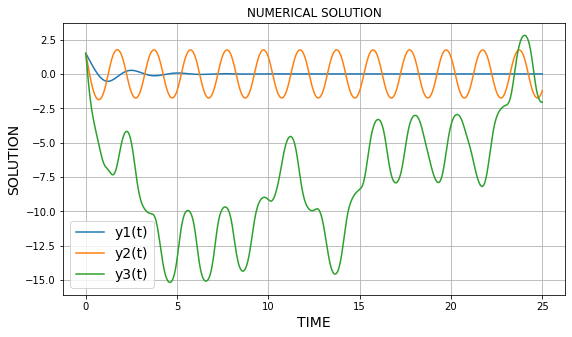

In [15]:
tspan = [0, 25]
stepsize = 1e-2
def idefun(t, y, z, i): return [-2.5 * i[0],
                                -7.5 * i[1],
                                -15 * i[2]]
def         K(t, s, y): return [sin(y[0]),
                                sin(y[1]),
                                sin(y[2])]
def      delays_int(t): return [t - 1,
                                t - 1,
                                t - 1]
def         history(t): return [1.5,
                                1.5,
                                1.5]

sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
OutputSolution()
OutputPlot()

# **Speed test**

In [16]:
import time

In [17]:
tspan = [1.1, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return ((t - 1) * exp(t**2) * i) / (exp(-1) * y - 1)
def         K(t, s, y): return [y * exp(-s * t)]
def      delays_int(t): return [t - 1]
def         history(t): return exp(t)

t = time.time()
sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
elapsed = time.time() - t

OutputSolution()
print("Elapsed time:", elapsed, "seconds")

y(5) = 148.41315925335257
Elapsed time: 2.0528764724731445 seconds


In [18]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return - y**2 - t * exp(t**2) * z**4 * i
def         K(t, s, y): return [y * exp(s - s * t)]
def        delays(t,y): return [t / 2]
def      delays_int(t): return [t - 1]
def         history(t): return exp(-t)

t = time.time()
sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
elapsed = time.time() - t

OutputSolution()
print("Elapsed time:", elapsed, "seconds")

y(5) = 0.0067379469814580545
Elapsed time: 2.8895528316497803 seconds


In [19]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return exp(1) - exp(t**2) / z**2 * (i[0] - exp(-2 * t) * i[1]) * (t - 1)
def         K(t, s, y): return [y * exp(-s * t),
                                y * exp(t * (2 - s))]
def       delays(t, y): return [t - 1]
def      delays_int(t): return [t - 1,
                                t - 2]
def         history(t): return exp(t)

t = time.time()
sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
elapsed = time.time() - t

OutputSolution()
print("Elapsed time:", elapsed, "seconds")

y(5) = 148.41315915325342
Elapsed time: 8.919706583023071 seconds


In [20]:
tspan = [0, 5]
stepsize = 1e-2
def idefun(t, y, z, i): return - z[0, 0]**((t + 1) / 2) * z[0, 1] * y**2 * (1 + exp(t**2) * t * i) / exp(1 / 2)
def         K(t, s, y): return [y * exp(s - s * t)]
def       delays(t, y): return [log(y)**2 / (t + 1) - 1 / 2,
                                (t - 1) / 4]
def      delays_int(t): return [t / 2 - 1]
def         history(t): return exp(-t)

t = time.time()
sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize, delays=delays)
elapsed = time.time() - t

OutputSolution()
print("Elapsed time:", elapsed, "seconds")

y(5) = 0.006737947029428378
Elapsed time: 6.5144712924957275 seconds


In [21]:
tspan = [0, 10]
stepsize = 1e-2
def idefun(t, y, z, i): return [-2.5 * i[0],
                                -15 * i[1],
                                0.001 * exp(t)]
def         K(t, s, y): return [sin(y[0]),
                                sin(y[1])]
def      delays_int(t): return [t - 1,
                                t - 1]
def         history(t): return [1.5,
                                1.5,
                                0.001 * exp(t)]

t = time.time()
sol = ide_solve(idefun, K, delays_int, history, tspan, stepsize)
elapsed = time.time() - t

OutputSolution()
print("Elapsed time:", elapsed, "seconds")

y1(10) = 0.004329876789507738
y2(10) = -9.145191243868801
y3(10) = 22.026465794883663
Elapsed time: 10.950530052185059 seconds
